### KNN
- 유유상종 : 끼리끼리 모인다
- K개의 가장 가까이 존재하는 데이터를 기준으로 결과를 알고리즘
- 데이터와 데이터의 거리를 도출해서 거리 순으로 정렬
- K개 만큼 가까이 있는 데이터 도출
    => 분류: 다수결 원칙으로 많은 종류의 데이터 결론 도출
    => 회귀: 데이터의 평균값으로 결과 도출
- 특징: 데이터의 규칙/패턴을 나타내는 수식 없음, 데이터를 메모리 모두 저장 후 거리를 측정해서 결과 도출 => 게으른 학습

## Scikit-learn 패키지
- 기계학습 방법
  (1) 학습 모델 인스턴스 생성
  (2) 학습 메서드 => fit(2D(데이터), 1D(라벨))
  (3) 테스트 메서드 => score(2D, 1D)
  (4) 활용 메서드 => predict(2D) ---> 결과

### 목표: 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 피 쳐 : Weight, Length
- 타 겟 : Speices
- 유 형 : 지도학습 / 분류

(1) 모듈 로딩 & 데이터

In [1]:
import pandas as pd                                 # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier  # 기계학습 관련 모듈

In [2]:
data_file = '../data/fish.csv'

In [3]:
# 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF = pd.read_csv(data_file, usecols=[0,1,2])

fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [4]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt'])  # Boolean Indexing

# 해당 행만 도출
twoFishDF = fishDF[mask]
twoFishDF.index

# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)
twoFishDF.head(5)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


(2) 데이터 전처리 <hr>
- 정제 : 결측치, 중복데이터, 이상치 처리
- 정규화 : 피쳐 스케일링

In [5]:
# 표준 정규분포 => 평균 0, 표준편차 1 => Z-score= 피쳐-평균/표준편차
# Weight 컬럼
ret1 = twoFishDF.Weight - twoFishDF.Weight.mean()
ret1 = ret1/twoFishDF.Weight.std()

#twoFishDF.loc[:, 'Weight'] = ret1

In [6]:
# Length 컬럼
ret2 = twoFishDF.Length - twoFishDF.Length.mean()
ret2 = ret2/twoFishDF.Length.std()

#twoFishDF.loc[:, 'Length'] = ret2

(3) 기계학습 데이터셋 준비 => 피쳐와 타겟 분리 <hr>

In [7]:
# 피쳐/특성/속성 데이터 추출
featureDF = twoFishDF[twoFishDF.columns[1:]]
featureDF.head(2)

,Weight,Length
0,242.0,25.4
1,290.0,26.3


In [8]:
# 클래스/타겟/라벨 데이터 추출 ==> 수치화 즉 정수인코딩
targetDF=twoFishDF['Species']
targetDF.head(2)

0    Bream
1    Bream
Name: Species, dtype: object

In [9]:
targetDF=targetDF.replace({'Bream':0, 'Smelt':1})
targetDF.dtype, targetDF.head(2)

(dtype('int64'),
 0    0
 1    0
 Name: Species, dtype: int64)

(3-1) 학습/테스트 데이터셋 분리 <hr>
- 지도학습 중 분류 => [고려] 타겟의 비율
- 학습 : 테스트 = 80 : 20

In [10]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, stratify=targetDF)

In [12]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---->\n{X_train.shape}, {y_train}')
print(f'{y_train.value_counts()/y_train.shape[0]}')

print(f'테스트용 데이터셋 ---->\n{X_test.shape}, {y_test}')
print(f'{X_test.value_counts()/y_test.shape[0]}')

학습용 데이터셋 ---->
(39, 2), 28    0
46    1
44    1
19    0
15    0
2     0
25    0
12    0
41    1
11    0
35    1
40    1
48    1
26    0
5     0
21    0
13    0
22    0
30    0
7     0
47    1
27    0
3     0
39    1
16    0
10    0
29    0
38    1
18    0
43    1
4     0
20    0
17    0
42    1
24    0
31    0
0     0
6     0
23    0
Name: Species, dtype: int64
Species
0    0.717949
1    0.282051
Name: count, dtype: float64
테스트용 데이터셋 ---->
(10, 2), 32    0
8     0
34    0
14    0
9     0
37    1
36    1
33    0
45    1
1     0
Name: Species, dtype: int64
Weight  Length
7.0     10.6      0.1
7.5     10.5      0.1
13.4    12.4      0.1
290.0   26.3      0.1
450.0   30.0      0.1
500.0   30.7      0.1
600.0   32.0      0.1
925.0   39.5      0.1
950.0   41.0      0.1
975.0   41.0      0.1
Name: count, dtype: float64


(3-2) 피쳐 데이터의 스케일링 <hr>
- 피쳐들의 값의 범위가 다른 것을 통일 시켜줌
- scikit-learn의 preprocessing 모듈 활용

In [13]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler

In [14]:
# 표준정규분포 스케일링 : 평균 0, 편차 1
# (1) 스케일러 인스턴스 생성
# (2) 데이터에 대한 평균, 표준편차 계산 진행 : fit() 메서드
# (3) 데이터에 대한 스케일링 진행 : transform() 메서드

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
scaler.mean_

array([437.5025641 ,  26.96666667])

In [18]:
# 학습용 데이터 피쳐 스케일링
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape

(39, 2)

In [19]:
# 테스트용 데이터 피쳐 스케일링
scaled_X_test = scaler.transform(X_test)
scaled_X_test.shape

(10, 2)

(3-3) 시각화 

In [20]:
# 모듈 로딩
import matplotlib.pyplot as plt

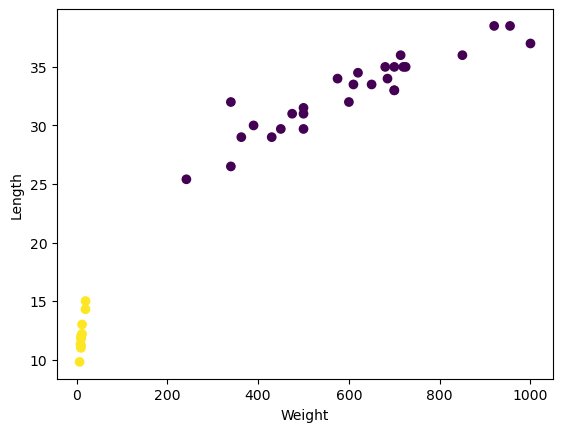

In [21]:
## => 원본 데이터 시각화
plt.scatter(X_train.Weight, X_train.Length, c=y_train)
plt.xlabel("Weight")
plt.ylabel("Length")
plt.show()

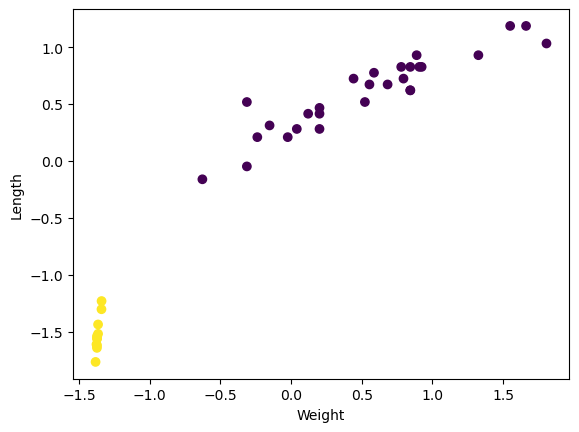

In [22]:
## => 스케일된 데이터 시각화 ==> scaled_X_train ndarray 타입
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c=y_train)
plt.xlabel("Weight")
plt.ylabel("Length")
plt.show()

(4) 학습 진행

In [23]:
# 방법 (1) : KNN 알고리즘
fishModel = KNeighborsClassifier()
fishModel.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [24]:
# 방법 (2) : SVC
from sklearn.svm import SVC

fishModel2=SVC()

fishModel2.fit(scaled_X_train, y_train)

SVC()

In [25]:
# 방법 (3) : LogisticRegression
from sklearn.linear_model import LogisticRegression

fishModel3 = LogisticRegression()

In [26]:
# 학습
fishModel3.fit(scaled_X_train, y_train)

LogisticRegression()

(5) 테스트 진행

In [27]:
print('KNN', fishModel.score(scaled_X_test, y_test))
print('SVC', fishModel2.score(scaled_X_test, y_test))
print('LogisticRegression', fishModel3.score(scaled_X_test, y_test))

KNN 1.0
SVC 1.0
LogisticRegression 1.0


(6) 예측 <hr>

In [28]:
## 생선 무게, 길이 입력 받은 후 결과 반환
input("생선의 무게, 길이 입력 (예: 90, 20) : ")


생선의 무게, 길이 입력 (예: 90, 20) : 90, 20


'90, 20'

In [29]:
## 길이 25, 무게, 160인 생선의 품종 예측
new_data = pd.DataFrame([[160, 25]], columns=twoFishDF.columns[1:])

new_data

,Weight,Length
0,160,25


In [30]:
# 피쳐스케일링 진행
scaled_new_data = scaler.transform(new_data)

In [31]:
# 예측
fishModel3.predict(scaled_new_data)

array([0], dtype=int64)